<a href="https://colab.research.google.com/github/Monazz/ML-poject/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Logistic **Regression**

## Module Install Notice!

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #% Problem, answer: Try substituting cross_validation to model_selection%

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

## Basic Mathematical Overview

Text(0.5, 1.0, ' Logistic Function ')

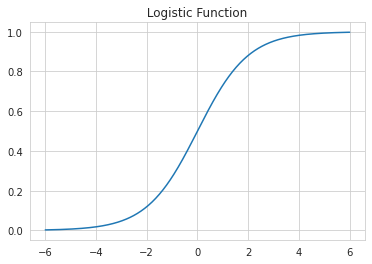

In [2]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')


## Data Visualization

Given certain variables for each woman, can we classify them as either having particpated in an affair, or not participated in an affair?

In [79]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

#Given certain variables for each woman, can we classify them as either having particpated in an affair, or not participated in an affair?

rate_marriage: How rate marriage, 1 = very poor, 2 = poor, 3 = fair,4 = good, 5 = very good


age: Age
yrs_married: No. years married. Interval approximations. See original paper for detailed explanation.

children: No. children
religious: How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly
educ: Level of education, 9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree

occupation: 1 = student, 2 = farming, agriculture semi-skilled, or unskilled worker; 3 = white-colloar; 4 = teacher counselor social worker, nurse; artist, writers;
technician, skilled worker, 5 = managerial,administrative, business, 6 = professional withadvanced degree

occupation_husb : Husband's occupation. Same as occupation.
affairs         : measure of time spent in extramarital affairs

In [86]:
# Preview
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [87]:
df.shape

(6366, 9)

In [88]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [89]:
# DataFrame Check
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [90]:
# Groupby Had Affair column
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [91]:
YY=df.groupby('age').size().sort_values(ascending=False).reset_index(name='Had_Affair')
YY.shape
print(type(YY))
YY_ary=np.array(YY)
YY_ary[:, 1]

<class 'pandas.core.frame.DataFrame'>


array([1931., 1800., 1069.,  793.,  634.,  139.])

In [92]:
# sum of "Had_Affair" based on age
df.age.value_counts().reset_index(name='Had_Affair')

,index,Had_Affair
0,27.0,1931
1,22.0,1800
2,32.0,1069
3,42.0,793
4,37.0,634
5,17.5,139


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


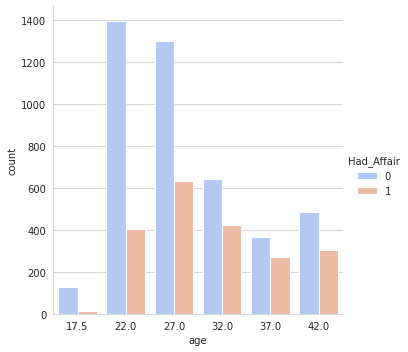

In [93]:
# Factorplot for age with Had Affair hue
sns.factorplot("age",hue="Had_Affair",data=df, kind="count",palette='coolwarm') # kind="count"

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


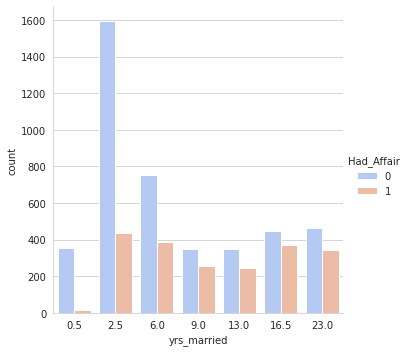

In [94]:
# Factorplot for years married with Had Affair hue
sns.factorplot('yrs_married',data=df,hue='Had_Affair',kind="count",palette='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


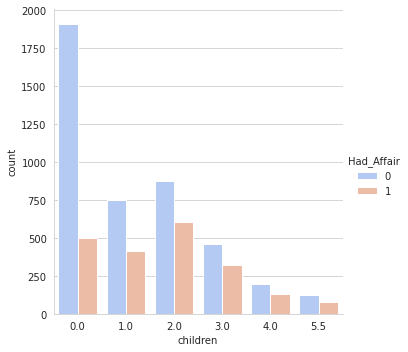

In [95]:
# Factorplot for number of children with Had Affair hue
sns.factorplot('children',data=df,hue='Had_Affair',kind="count",palette='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


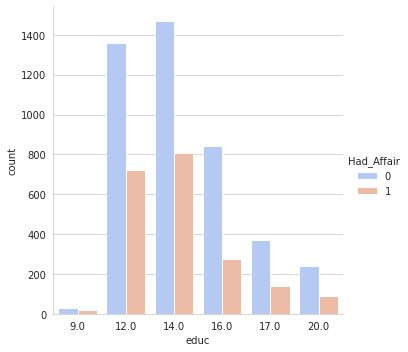

In [96]:
# Factorplot for number of children with Had Affair hue
sns.factorplot('educ',data=df,hue='Had_Affair',kind="count",palette='coolwarm')

Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,married longer, and slightly less religious and less educated. However, the mean values of both classes are very close for all variables.


## Data Preparation
`Dummy variable`



Occupation and Husband's Occupation are in a format know as Categorical Variables. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy variables and creating new columns from them.

In [82]:
# Create new DataFrames for the Categorical Variables
#dummy variables changes the value to a categorical variable
# so. regression do not consider the dummys as value
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


here we have a category of 

```
# This is formatted as code
```



In [97]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [100]:
# Set X as new DataFrame without the occupation columns or the Y target
#axis=1 shows that we drop a col not row
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666
...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000


In [105]:
# Concatinate the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)
dummies.shape
dummies

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0,0,0,1,0,0,0,0,1,0,0,0
6362,0,0,0,0,1,0,0,0,0,0,1,0
6363,0,0,1,0,0,0,1,0,0,0,0,0
6364,0,0,1,0,0,0,0,0,0,1,0,0


In [106]:
# Now Concat the X DataFrame with the dummy variables
#axis=1 because we are doing it along the col
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,...,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [121]:
# Set Y as Target class, Had Affair
Y = df.Had_Affair

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

## Multicollinearity Consideration.



> Indented block
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. This means that an independent variable can be predicted from another independent variable in a regression model.



In [108]:
# Dropping one column of each dummy variable set to avoid multicollinearity
## axis=1 because we are doing it along the col not Row
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# Drop affairs column so Y target makes sense (bcs Y is a repeat of "affairs col")
## axis=1 because we are doing it along the col not Row
X = X.drop('affairs',axis=1)

# PReview
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,...,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [122]:
Y


0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In [123]:
Y.shape

(6366,)

In [124]:
# Flatten array
#In order to use the Y with SciKit Learn, we need to set it as a 1-D array.
#This means we need to "flatten" the array. Numpy has a built in method for this called ravel.
Y = np.ravel(Y) # Y = df.Had_Affair

# Check result
Y

array([1, 1, 1, ..., 0, 0, 0])

In [125]:
Y.shape

(6366,)

## Logistic Regression with SciKit Learn

In [127]:
# Create LogisticRegression model
log_model = LogisticRegression()



In [130]:
# Check percentage of women that had affairs
Y.mean()

0.3224945020420987

In [138]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df

,0,1
0,rate_marriage,[-0.6845982060856667]
1,age,[-0.05263852560072936]
2,yrs_married,[0.09725875928541411]
3,children,[0.024966151927828136]
4,religious,[-0.3481352761447336]
5,educ,[0.007011503089177192]
6,occ2,[0.25886818252665034]
7,occ3,[0.4403043173352551]
8,occ4,[0.29759114742907317]
9,occ5,[0.6022428861681871]


## Testing and Training Data Sets
`Create a Model and Train It`


In [144]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


In [156]:
# Make a new log_model
#solver info
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_model2 = LogisticRegression(solver='liblinear', random_state=0)

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [152]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)



In [153]:
# Compare the predicted classes to the actual test classes
# RESULT =1 , Perfect regression
metrics.accuracy_score(Y_test,class_predict)

0.7305276381909548